1.**Data importation**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [5]:
df=pd.read_csv("/content/tips.csv/archive (1).zip")
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


**2.understand the data**

In [6]:
df.info ()
pd.to_numeric(df['total_bill'],errors='coerce')
df.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null   

In [7]:
df.describe ()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


**3.data cleaning**

In [8]:
df.isnull().any()

,0
total_bill,False
tip,False
sex,False
smoker,False
day,False
time,False
size,False


In [9]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [10]:
df['sex'].unique()


array(['Female', 'Male'], dtype=object)

In [11]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
df.shape

(244, 7)

**Total Bill vs Tips**

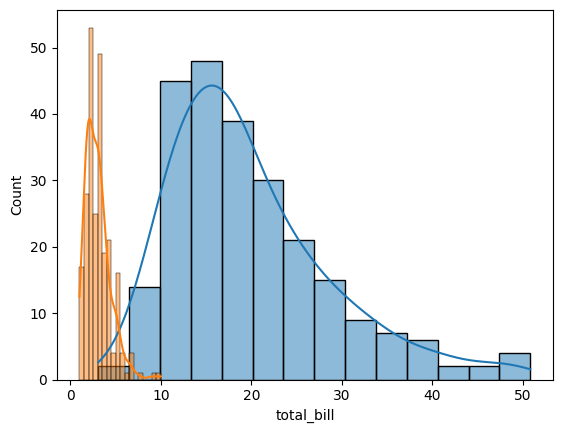

In [13]:
sns.histplot(df['total_bill'], kde=True)  # Distribution of total bill
sns.histplot(df['tip'], kde=True)  # Distribution of tip
plt.show()



**Gender Distribution**

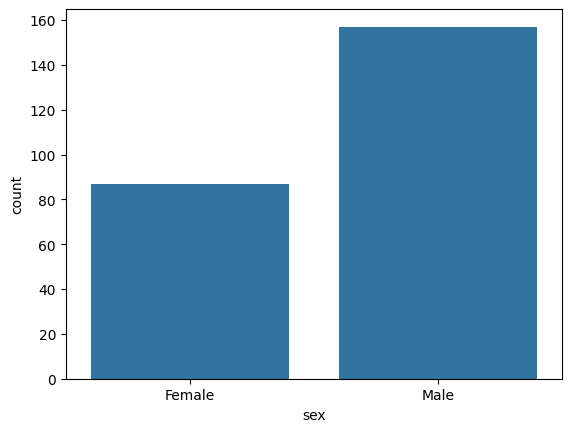

In [14]:
sns.countplot(x='sex', data=df) # Replace data with df
plt.show()


**Smokers vs Non-Smokers**

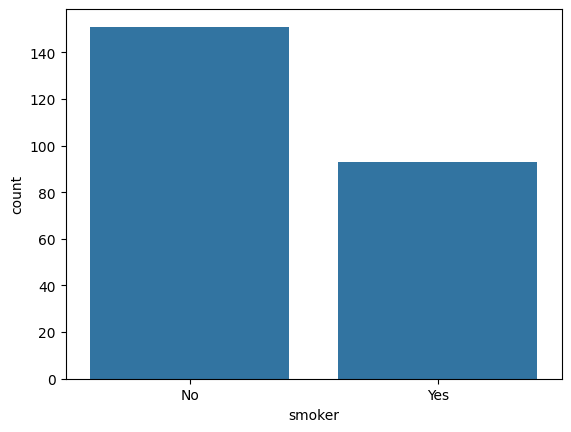

In [15]:
sns.countplot(x='smoker', data=df) # Changed 'data' to 'df'
plt.show()


**Tips by the Day**

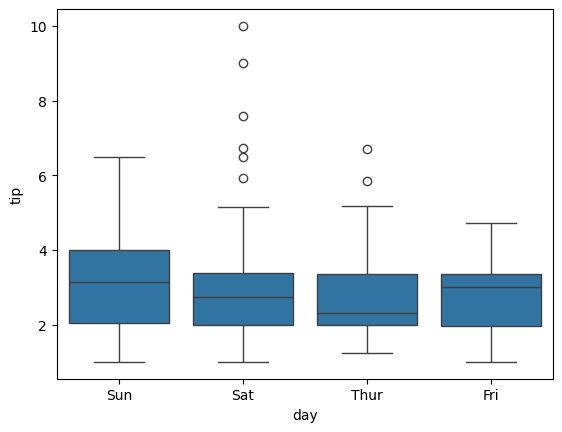

In [16]:
sns.boxplot(x='day', y='tip', data=df) # Changed 'data' to 'df'
plt.show()



**Correlational Analysis**

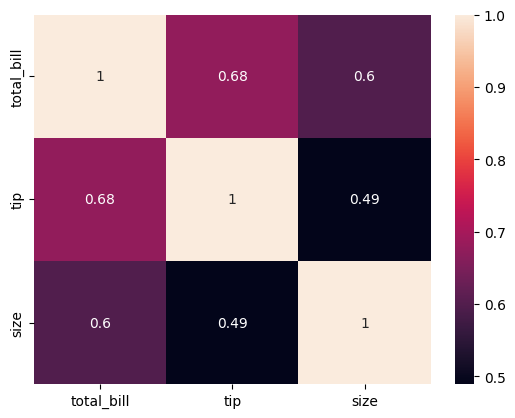

In [17]:
# Select only the numerical columns for correlation analysis
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.show()

**Step 4:Advanced Analysis**


**Tip Percentage**

In [18]:
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100 # Changed 'data' to 'df' and corrected 'tal_bill' to 'total_bill'
print(df.head()) # Changed 'data' to 'df'


   total_bill   tip     sex smoker  day    time  size  tip_percentage
0       16.99  1.01  Female     No  Sun  Dinner     2        5.944673
1       10.34  1.66    Male     No  Sun  Dinner     3       16.054159
2       21.01  3.50    Male     No  Sun  Dinner     3       16.658734
3       23.68  3.31    Male     No  Sun  Dinner     2       13.978041
4       24.59  3.61  Female     No  Sun  Dinner     4       14.680765


**Group Analysis**

In [19]:
print(df.groupby('sex')['tip'].mean())
print(df.groupby('smoker')['tip'].mean())
print(df.groupby('time')['tip'].mean())

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64
smoker
No     2.991854
Yes    3.008710
Name: tip, dtype: float64
time
Dinner    3.102670
Lunch     2.728088
Name: tip, dtype: float64


**Size vs Tips**

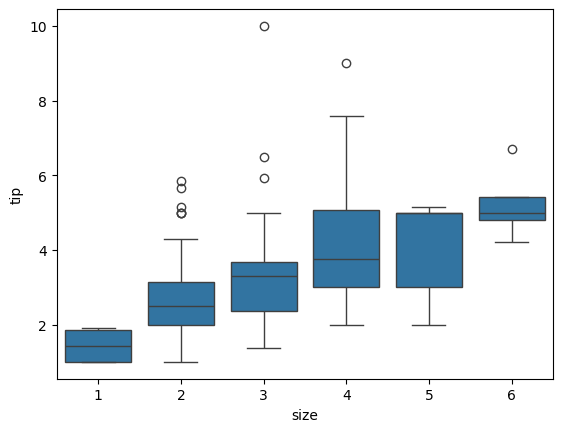

In [20]:
sns.boxplot(x='size',y='tip',data=df)
plt.show()

**Hypothesiis Testing**

In [21]:
from scipy.stats import ttest_ind
smoker =df[df['smoker'] =='yes']['tip']
from scipy.stats import ttest_ind
smoker =df[df['smoker'] =='yes']['tip']
non_smoker =df[df['smoker'] =='no']['tip']
t_stats, p_value=ttest_ind(smoker,non_smoker)
print(f"T-statistics: {t_stats}, P-Value: {p_value}")

T-statistics: nan, P-Value: nan


**Do male tip more than females**

In [22]:
males = df[df['sex'] == 'Male']['tip']
females = df[df['sex'] == 'Female']['tip']
t_stat, p_value = ttest_ind(males, females)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")


T-Statistic: 1.387859705421269, P-Value: 0.16645623503456755


**Visualizations**

**TOTAL BILL VS.TIP**

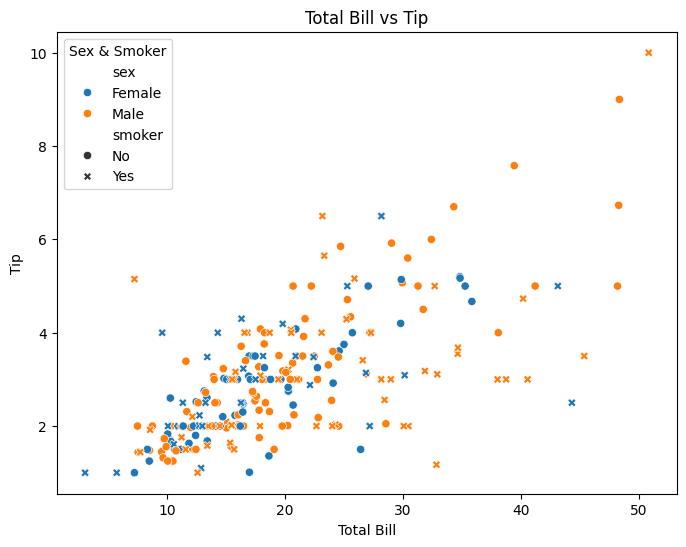

In [23]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=df, hue='sex', style='smoker') # Changed 'data' to 'df' and corrected 'tal_bill' to 'total_bill'
plt.title('Total Bill vs Tip')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.legend(title='Sex & Smoker')
plt.show()


**GENDER DISTRIBUTION**

<ipython-input-24-9e80cbbba7ac>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='coolwarm') # Changed 'data' to 'df'


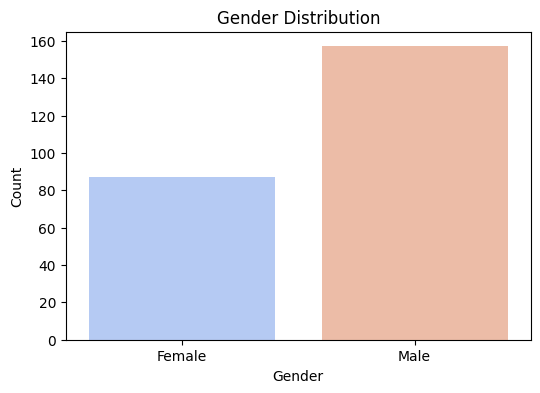

In [24]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df, palette='coolwarm') # Changed 'data' to 'df'
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**AVERAGE TIP BY GENDER**


<ipython-input-25-0adc8064acc2>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='sex', y='tip', data=df, ci=None, palette='viridis') # Changed 'df' to 'data'
<ipython-input-25-0adc8064acc2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='sex', y='tip', data=df, ci=None, palette='viridis') # Changed 'df' to 'data'


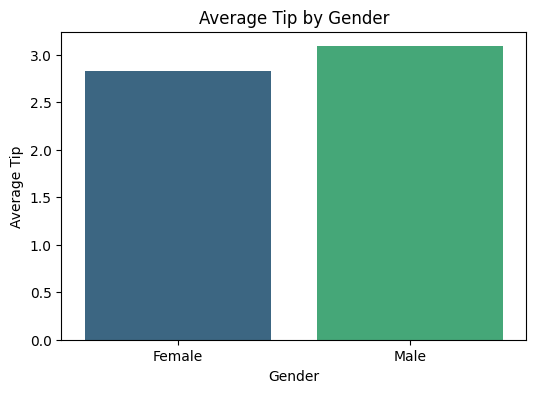

In [25]:
plt.figure(figsize=(6, 4))
sns.barplot(x='sex', y='tip', data=df, ci=None, palette='viridis') # Changed 'df' to 'data'
plt.title('Average Tip by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Tip')
plt.show()


**TIP BY DAY**

<ipython-input-26-ecdcaa6118d3>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='day', y='tip', data=df, ci=None, palette='viridis') # Changed 'tip' to 'tip' and 'none' to 'None' , changed 'data' to 'df'
<ipython-input-26-ecdcaa6118d3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=df, ci=None, palette='viridis') # Changed 'tip' to 'tip' and 'none' to 'None' , changed 'data' to 'df'


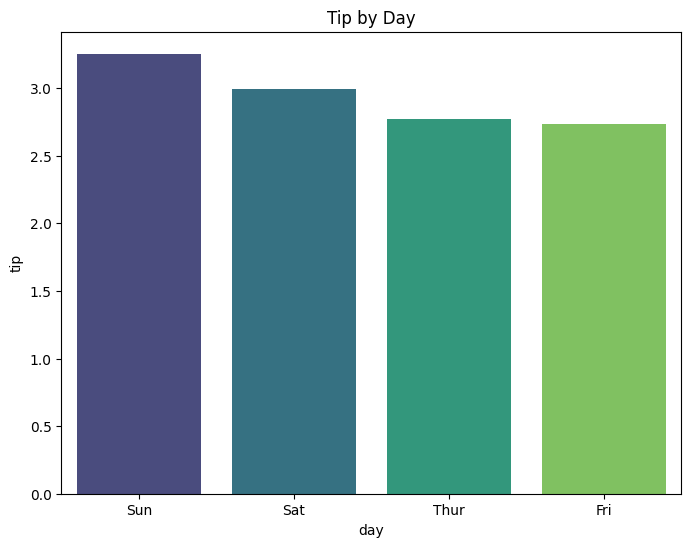

In [26]:
plt.figure(figsize=(8, 6))
sns.barplot(x='day', y='tip', data=df, ci=None, palette='viridis') # Changed 'tip' to 'tip' and 'none' to 'None' , changed 'data' to 'df'
plt.title('Tip by Day') # Changed 'plt.ttile' to 'plt.title' and added a descriptive title
plt.show()

**TIPS BY SMOKERS STATUS**

<ipython-input-27-eb14f307a466>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='smoker', y='tip', data=df, ci=None, palette='husl') # Changed 'data' to 'df'
<ipython-input-27-eb14f307a466>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker', y='tip', data=df, ci=None, palette='husl') # Changed 'data' to 'df'


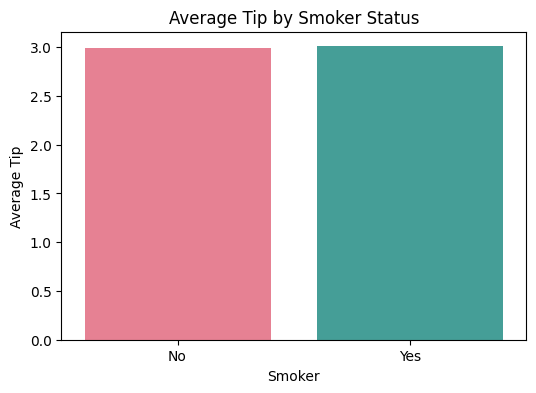

In [27]:
plt.figure(figsize=(6, 4))
sns.barplot(x='smoker', y='tip', data=df, ci=None, palette='husl') # Changed 'data' to 'df'
plt.title('Average Tip by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Average Tip')
plt.show()


**TIPS BY TIME OF DAY**






<ipython-input-28-db6be7f5455e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='time', y='tip', data=df, ci=None, palette='coolwarm') # Changed 'data' to 'df'
<ipython-input-28-db6be7f5455e>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time', y='tip', data=df, ci=None, palette='coolwarm') # Changed 'data' to 'df'


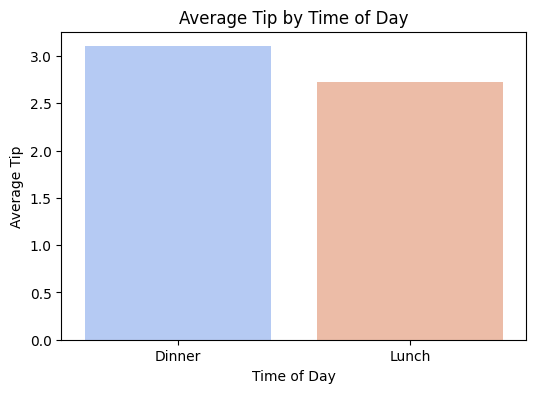

In [28]:
plt.figure(figsize=(6, 4))
sns.barplot(x='time', y='tip', data=df, ci=None, palette='coolwarm') # Changed 'data' to 'df'
plt.title('Average Tip by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Average Tip')
plt.show()


**PARTY SIZE VS TIPS**

<ipython-input-29-2b1d2cfbea48>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='size', y='tip', data=df, palette='muted') # Changed 'data' to 'df'


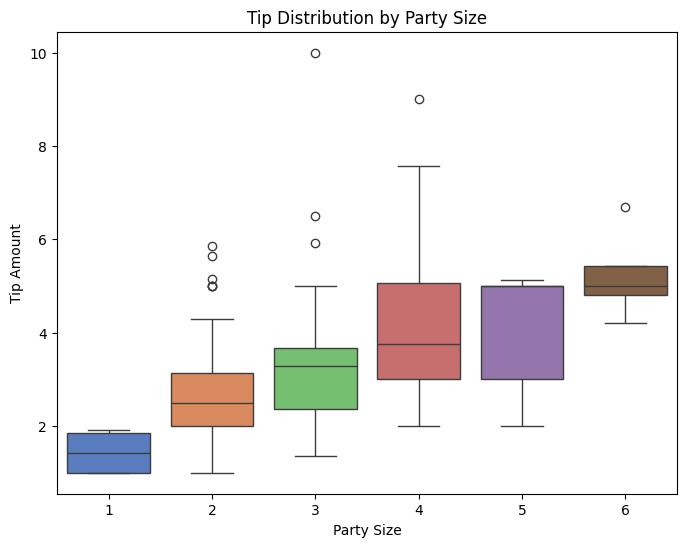

In [29]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='size', y='tip', data=df, palette='muted') # Changed 'data' to 'df'
plt.title('Tip Distribution by Party Size')
plt.xlabel('Party Size')
plt.ylabel('Tip Amount')
plt.show()


**CORRELATION HEATMAP**

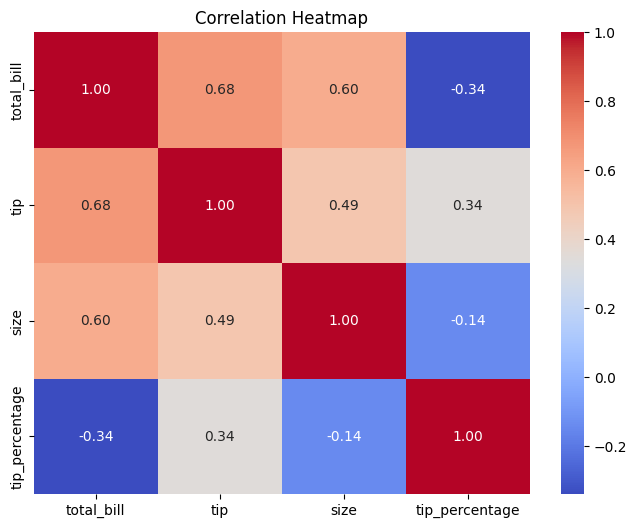

In [30]:
plt.figure(figsize=(8, 6))
# Select only numerical features for correlation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr() # Changed 'data' to 'df'
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


**TIPS PERCENTAGE ANALYSIS**

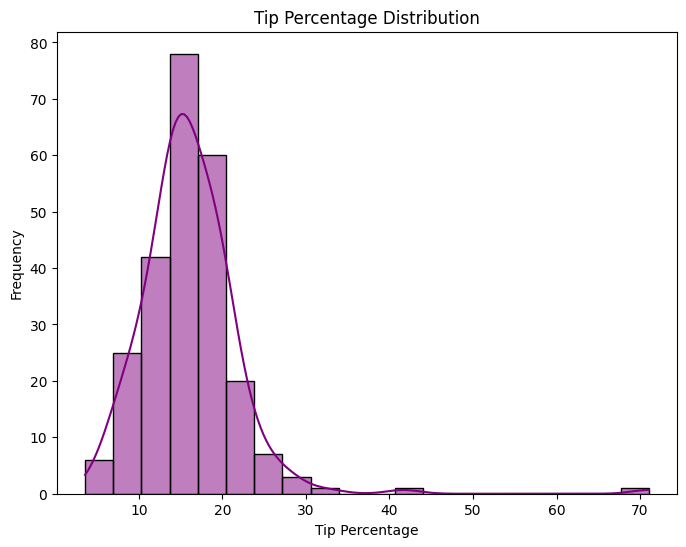

In [31]:
df['tip_percentage'] = (df['tip'] / df['total_bill']) * 100

plt.figure(figsize=(8, 6))
sns.histplot(df['tip_percentage'], kde=True, color='purple', bins=20)
plt.title('Tip Percentage Distribution')
plt.xlabel('Tip Percentage')
plt.ylabel('Frequency')
plt.show()


**AVERAGE TIPS BY DAY**

    day       tip
0   Fri  2.734737
1   Sat  2.993103
2   Sun  3.255132
3  Thur  2.771452


<ipython-input-32-65779eebfe5c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='tip', data=avg_tip_by_day, palette='pastel')


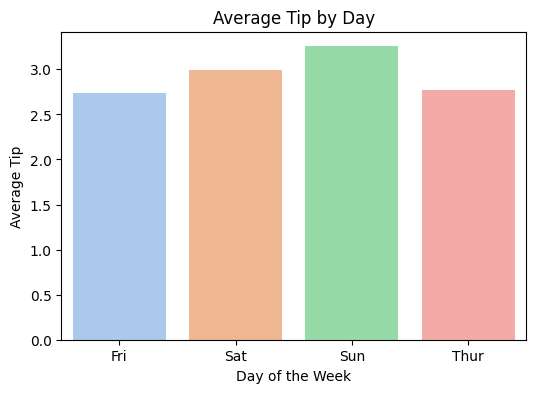

In [32]:
avg_tip_by_day = df.groupby('day')['tip'].mean().reset_index() # Change 'data' to 'df'

print(avg_tip_by_day)

plt.figure(figsize=(6, 4))
sns.barplot(x='day', y='tip', data=avg_tip_by_day, palette='pastel')
plt.title('Average Tip by Day')
plt.xlabel('Day of the Week')
plt.ylabel('Average Tip')
plt.show()


**SIGNIFICANT DIFFERENCE IN TIPS BY GENDER**

In [33]:
from scipy.stats import ttest_ind

males = df[df['sex'] == 'Male']['tip'] # Changed 'data' to 'df'
females = df[df['sex'] == 'Female']['tip'] # Changed 'data' to 'df'

t_stat, p_value = ttest_ind(males, females)

print(f"T-Statistic: {t_stat}, P-Value: {p_value}")
if p_value < 0.05:
    print("There is a significant difference in tips between males and females.")
else:
    print("No significant difference in tips between males and females.")


T-Statistic: 1.387859705421269, P-Value: 0.16645623503456755
No significant difference in tips between males and females.


** SAVED RESULTS**

In [34]:
# Save a summary table
avg_tip_by_day.to_csv('avg_tip_by_day.csv', index=False)

# Save visualizations
plt.savefig('tip_vs_bill.png')
plt.savefig('gender_distribution.png')


<Figure size 640x480 with 0 Axes>